In [15]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.special import expit as sigmoid

def simulate_logistic_regression_data(n, d):
    np.random.seed(0) # For reproducibility
    X = np.random.randn(n, d) # Generate features
    beta_true = np.random.randn(d) # True coefficient vector
    beta_true = 2* beta_true / np.linalg.norm(beta_true)
    linear_combination = X.dot(beta_true)
    p = 1 / (1 + np.exp(-linear_combination)) # Sigmoid function
    y = np.random.binomial(1, p) # Generate binary outcomes
    return X, y, beta_true

# Example usage
n, d = 5000, 1000 # Number of observations and features
X, y, beta_true = simulate_logistic_regression_data(n, d)


In [3]:
def logistic_loss(beta, X, y):
    """
    Compute logistic loss.
    """
    logits = np.dot(X, beta)
    loss = -np.sum(y * logits - np.log(1 + np.exp(logits)))
    return loss

def logistic_gradient(beta, X, y):
    """
    Compute the gradient of the logistic loss.
    """
    p = 1 / (1 + np.exp(-np.dot(X, beta)))
    gradient = np.dot(X.T, (p - y))
    return gradient

def logistic_hessian(beta, X):
    """
    Compute the Hessian of the logistic loss.
    """
    p = 1 / (1 + np.exp(-np.dot(X, beta)))
    W = np.diag(p * (1 - p))
    Hessian = np.dot(X.T, W).dot(X)
    return Hessian


Convergence achieved.
Gradient Descent method completed in 1.3014 seconds.
Convergence status: True
Final gradient norm: 0.0000
Norm difference between estimated and true beta: 2.2000985753360216


/var/folders/mb/6qcb8p7j0yz1_bmv1h2vfy_80000gn/T/ipykernel_27056/426295481.py:46: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.array(function_values_gd) - optimal_value))


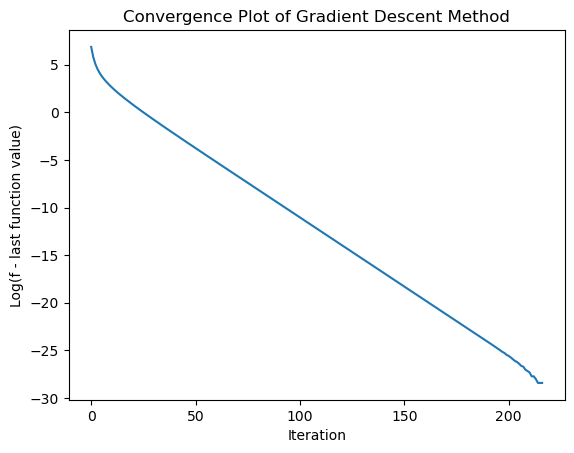

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time

def gradient_descent(X, y, max_iter=400, tol=1e-5, learning_rate=0.001):
    beta = 0.1 *np.ones(X.shape[1])  # Initialize coefficients
    function_values = []  # Store function values at each iteration
    check_optimality = False

    for _ in range(max_iter):
        gradient = logistic_gradient(beta, X, y)
        beta_update = learning_rate * gradient
        beta -= beta_update  # Update beta

        # Store the current function value
        function_values.append(logistic_loss(beta, X, y))

        # Check for convergence
        if np.linalg.norm(gradient) < tol:
            print("Convergence achieved.")
            check_optimality = True
            break

    final_gradient_norm = np.linalg.norm(gradient)
    if not check_optimality:
        print("Did not converge.")
    return beta, check_optimality, final_gradient_norm, function_values

# Timing the execution
start_time = time.time()

# Call the Gradient Descent method
beta_gd, check_optimality, final_gradient_norm, function_values_gd = gradient_descent(X, y)

end_time = time.time()
time_taken = end_time - start_time

optimal_value = function_values_gd[-1]
# Output
print(f"Gradient Descent method completed in {time_taken:.4f} seconds.")
print(f"Convergence status: {check_optimality}")
print(f"Final gradient norm: {final_gradient_norm:.4f}")
print(f"Norm difference between estimated and true beta: {np.linalg.norm(beta_gd - beta_true)}")

# Plotting
plt.plot(np.log(np.array(function_values_gd) - optimal_value))
plt.xlabel('Iteration')
plt.ylabel('Log(f - last function value)')
plt.title('Convergence Plot of Gradient Descent Method')
plt.show()


Did not converge.
Newton's method completed in 4.5085 seconds.
Convergence status: False
Final gradient norm: 46.4933
Norm difference between estimated and true beta: 1.8941761365845606


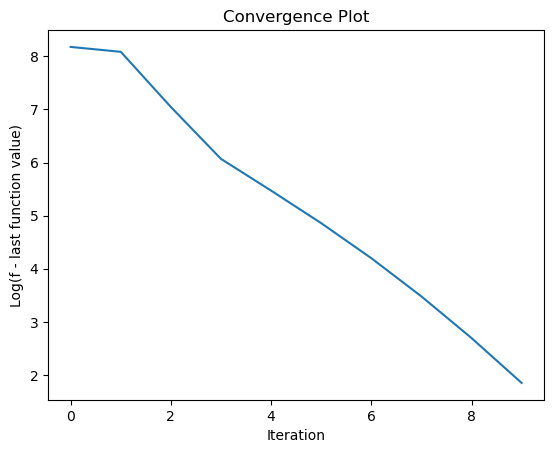

In [5]:
def newtons_method(X, y, max_iter=10, tol=1e-3,   learning_rate = 0.4):
    beta = 0.1 *np.ones(X.shape[1])
    check_optimality = False
    function_values = []

    for _ in range(max_iter):
        gradient = logistic_gradient(beta, X, y)
        Hessian = logistic_hessian(beta, X) + tol * np.eye(X.shape[1])

        beta_update = np.linalg.solve(Hessian, gradient)
        #if np.linalg.norm(beta_update) < tol:
        #     break
        beta -= learning_rate* beta_update
        # store function value
        function_values.append(logistic_loss(beta, X, y))

    final_gradient_norm = np.linalg.norm(logistic_gradient(beta, X, y))
    if final_gradient_norm < tol:
        print("Convergence achieved.")
        check_optimality = True
    else:
        print("Did not converge.")
    return beta, check_optimality, final_gradient_norm, function_values


start_time = time.time()  # Record the start time

# Call the Newton's method
beta_newton, check_optimality, final_gradient_norm, function_values_newton = newtons_method(X, y)

end_time = time.time()  # Record the end time
time_taken = end_time - start_time  # Calculate the difference

print(f"Newton's method completed in {time_taken:.4f} seconds.")  # Print the time taken
print(f"Convergence status: {check_optimality}")
print(f"Final gradient norm: {final_gradient_norm:.4f}")
print(f"Norm difference between estimated and true beta: {np.linalg.norm(beta_newton - beta_true)}")


# Plotting
plt.plot(np.log(np.array(function_values_newton) - optimal_value))
plt.xlabel('Iteration')
plt.ylabel('Log(f - last function value)')
plt.title('Convergence Plot')
plt.show()

Did not converge.
Approximate Newton's method completed in 7.1134 seconds.
Convergence status: False
Final gradient norm: 0.0000
Norm difference between estimated and true beta: 2.2000691843882954
Norm difference between this estimated beta and the one found by GD: 3.4440496994145446e-05


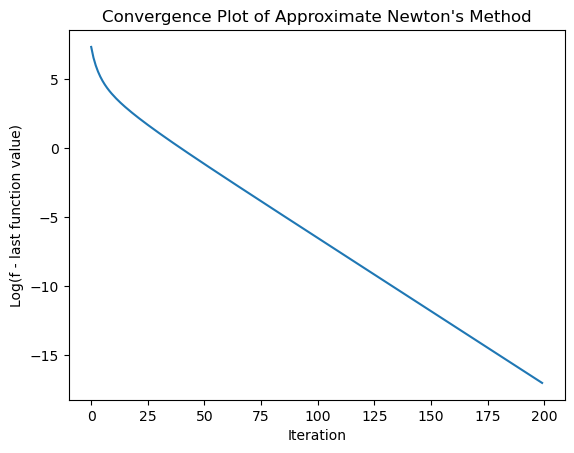

In [16]:

def approx_newtons_method(X, y, max_iter=200, tol=1e-3, learning_rate=0.4):
    beta = 0.1 * np.ones(X.shape[1])
    function_values = []  # To store function values at each iteration
    check_optimality = False

    for _ in range(max_iter):
        # Slow approach to compute the Hessian
        #gradient = logistic_gradient(beta, X, y)
        #Hessian = logistic_hessian(beta, X) + tol * np.eye(X.shape[1])

        #beta_update = np.linalg.solve(Hessian, gradient)
        #beta -= learning_rate * beta_update
        ## function value
        #function_values.append(logistic_loss(beta, X, y))

        # Fast approach to compute the Hessian
        gradient = logistic_gradient(beta, X, y)
        
        # Compute the predicted probabilities
        p = sigmoid(X @ beta)  
        
        # Compute weights for the diagonal Hessian approximation
        W = p * (1 - p)  # Element-wise multiplication
        
        # Direct computation of the diagonal of the Hessian
        H_diag = np.sum(X**2 * W[:, np.newaxis], axis=0) + tol
        
        # Compute the update
        beta_update = gradient / H_diag
        beta -= learning_rate * beta_update
        
        # Compute and record the function value
        function_values.append(logistic_loss(beta, X, y))

    final_gradient_norm = np.linalg.norm(gradient)
    if final_gradient_norm < tol:
        print("Convergence achieved.")
        check_optimality = True
    else:
        print("Did not converge.")

    return beta, check_optimality, function_values

# Measure execution time
start_time = time.time()

# Call the approximate Newton's method
beta_diag, check_optimality, function_values_diag = approx_newtons_method(X, y)

end_time = time.time()
time_taken = end_time - start_time

# Output
print(f"Approximate Newton's method completed in {time_taken:.4f} seconds.")
print(f"Convergence status: {check_optimality}")
print(f"Final gradient norm: {final_gradient_norm:.4f}")
print(f"Norm difference between estimated and true beta: {np.linalg.norm(beta_diag - beta_true)}")
print(f"Norm difference between this estimated beta and the one found by GD: {np.linalg.norm(beta_diag - beta_gd)}")
# Plotting
plt.plot(np.log(np.array(function_values_diag) - optimal_value))
plt.xlabel('Iteration')
plt.ylabel('Log(f - last function value)')
plt.title('Convergence Plot of Approximate Newton\'s Method')
plt.show()

Convergence achieved.
BFGS method completed in 25.8702 seconds.
Convergence status: True
Final gradient norm: 0.0000
Norm difference between estimated and true beta: 2.200098686482682
Norm difference between this estimated beta and the one found by GD: 1.3093152632639096e-07


/var/folders/mb/6qcb8p7j0yz1_bmv1h2vfy_80000gn/T/ipykernel_27056/3940576255.py:50: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.array(function_values_bfgs) - optimal_value))
/var/folders/mb/6qcb8p7j0yz1_bmv1h2vfy_80000gn/T/ipykernel_27056/3940576255.py:50: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(np.array(function_values_bfgs) - optimal_value))


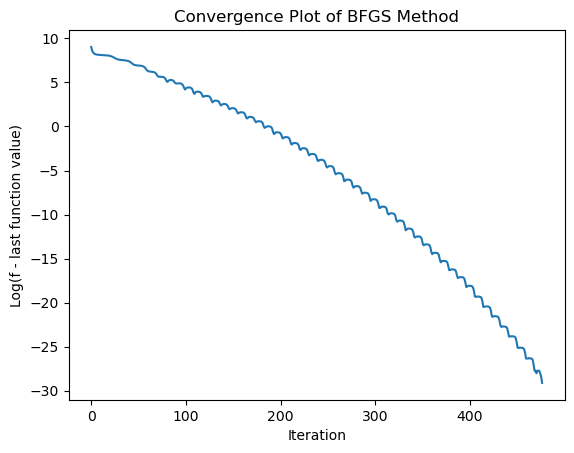

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import time

def bfgs_method(X, y, max_iter=500, tol=1e-3, learning_rate=0.005):
    beta = 0.1 * np.ones(X.shape[1])
    H_inv = np.eye(X.shape[1])  # Inverse Hessian approximation
    function_values = []  # Store function values at each iteration
    check_optimality = False

    for _ in range(max_iter):
        gradient = logistic_gradient(beta, X, y)
        beta_update = -learning_rate * H_inv.dot(gradient)
        beta_new = beta + beta_update
        s = beta_new - beta
        delta_grad = logistic_gradient(beta_new, X, y) - gradient  # Renamed variable
        rho = 1 / np.dot(delta_grad, s)
        H_inv = (np.eye(X.shape[1]) - rho * np.outer(s, delta_grad)).dot(H_inv).dot(np.eye(X.shape[1]) - rho * np.outer(delta_grad, s)) + rho * np.outer(s, s)

        beta = beta_new
        function_values.append(logistic_loss(beta, X, y))


    final_gradient_norm = np.linalg.norm(logistic_gradient(beta, X, y))
    if final_gradient_norm < tol:
        print("Convergence achieved.")
        check_optimality = True
    else:
        print("Did not converge.")

    return beta, check_optimality, final_gradient_norm, function_values

# Timing the execution
start_time = time.time()

# Call the BFGS method
beta_bfgs, check_optimality, final_gradient_norm, function_values_bfgs = bfgs_method(X, y)

end_time = time.time()
time_taken = end_time - start_time

# Output
print(f"BFGS method completed in {time_taken:.4f} seconds.")
print(f"Convergence status: {check_optimality}")
print(f"Final gradient norm: {final_gradient_norm:.4f}")
print(f"Norm difference between estimated and true beta: {np.linalg.norm(beta_bfgs - beta_true)}")
print(f"Norm difference between this estimated beta and the one found by GD: {np.linalg.norm(beta_bfgs - beta_gd)}")

# Plotting
plt.plot(np.log(np.array(function_values_bfgs) - optimal_value))
plt.xlabel('Iteration')
plt.ylabel('Log(f - last function value)')
plt.title('Convergence Plot of BFGS Method')
plt.show()

#print(beta_bfgs)
# print(beta_newton)